In [1]:
%load_ext autoreload
%autoreload
from pyScoreParser import data_class, xml_utils, utils, feature_utils
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pwd # should be notebook directory

/data/projects/PerformanceDataTutorial/3_pyScoreParser


In [3]:
file_root = '../assets/Beethoven_Sonata_8_2/'
xml_file = Path(file_root) / 'score.xml'
midi_files = [el for el in Path(file_root).glob('*.mid') if 'score' not in el.name]

In [4]:
piece_data = data_class.PieceData(xml_path=xml_file,
                                  perform_lists=midi_files)

available_pairs: 1526
Number of mismatched notes:  0
Matched:1531 (Diff(nonzero_score):98), 
 match after cleaning:1531 (diff:0)
Number of Matched Notes: 1531, unmatched notes: 98
available_pairs: 1454
Number of mismatched notes:  21
Matched:1460 (Diff(nonzero_score):169), 
 match after cleaning:1442 (diff:18)
Number of Matched Notes: 1442, unmatched notes: 187
available_pairs: 1536
Number of mismatched notes:  14
Matched:1542 (Diff(nonzero_score):87), 
 match after cleaning:1532 (diff:10)
Number of Matched Notes: 1532, unmatched notes: 97


In [5]:
performance = piece_data.performances[0]

In [6]:
perform_notes = performance.midi_notes

In [7]:
perform_notes[0]

Note(start=0.832292, end=2.944792, pitch=60, velocity=59)

### make piano roll with perform_notes

In [8]:
matched_idx = performance.match_between_xml_perf

In [9]:
matched_idx

[[],
 [],
 [],
 2,
 3,
 4,
 6,
 7,
 5,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 30,
 27,
 31,
 32,
 34,
 33,
 35,
 37,
 36,
 38,
 39,
 40,
 42,
 41,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 81,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 90,
 93,
 92,
 94,
 96,
 95,
 [],
 97,
 98,
 99,
 100,
 101,
 102,
 [],
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 116,
 119,
 120,
 118,
 121,
 [],
 122,
 123,
 124,
 125,
 126,
 127,
 130,
 129,
 128,
 132,
 131,
 134,
 133,
 135,
 136,
 137,
 139,
 138,
 141,
 140,
 142,
 143,
 [],
 145,
 144,
 146,
 148,
 [],
 147,
 150,
 149,
 153,
 151,
 [],
 152,
 155,
 154,
 156,
 159,
 158,
 157,
 161,
 160,
 162,
 165,
 164,
 163,
 167,
 166,
 169,
 170,
 168,
 [],
 171,
 172,
 173,
 [],
 174,
 175,
 176,
 [],
 177,


In [10]:
def note_to_pixel(note, frame_per_second=50):
    # convert note into array index
    onset_x = np.rint(note.start*frame_per_second)
    offset_x = np.rint(note.end*frame_per_second)
    y = note.pitch - 21
    return dict(x_start=onset_x, x_end=offset_x, y=y)

In [11]:
note_to_pixel(perform_notes[0])

{'x_start': 42.0, 'x_end': 147.0, 'y': 39}

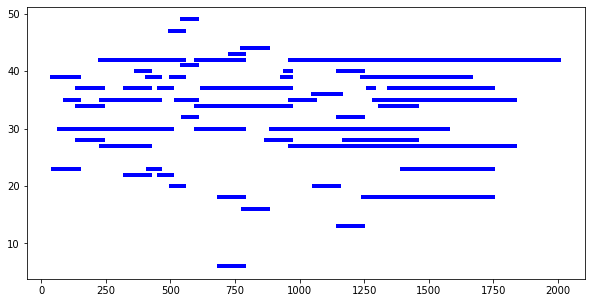

In [12]:
draw_range = 30 # let's draw first 30 seconds
figure = plt.figure(figsize=(10,5))
for note in perform_notes:
    if note.start < draw_range:
        arr_dict = note_to_pixel(note)
        # plt.hlines(arr_dict['y'], [arr_dict['x_start'], arr_dict['x_end']])
        plt.plot([arr_dict['x_start'], arr_dict['x_end']], [arr_dict['y'], arr_dict['y']], linewidth=4, color='b')

we will paint aligned notes with blue, and non-aligned notes with red

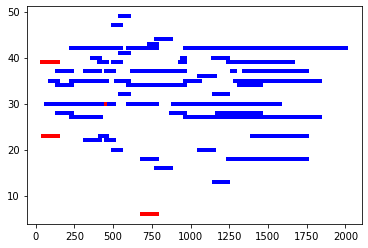

In [13]:
for n, note in enumerate(perform_notes):
    if note.start < draw_range:
        if n in matched_idx:
            color = 'b'
        else:
            color = 'r'
        arr_dict = note_to_pixel(note)
        # plt.hlines(arr_dict['y'], [arr_dict['x_start'], arr_dict['x_end']])
        plt.plot([arr_dict['x_start'], arr_dict['x_end']], [arr_dict['y'], arr_dict['y']], linewidth=4, color=color)